#**Training Neural-Networks with MNIST dataset**



First we import some important libraries

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.9.2


Now, let's import the MNIST dataset.

In [131]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#f_mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Rescaling both image sets so that values are relative to 1
train_images=train_images/255.0
test_images=test_images/255.0

In [132]:
#get stats for the image sets
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
First label: 5
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


#Part 1: Noise-adding function

First, we define a function to add noise to an image-set, which will be very useful later.

In [133]:
def add_noise(images, ynoise):            
    '''
    This function adds unifomly distributed noise to a dataset.
    
    Inputs:
          images: a dataet of images
          ynoise: the upper-limit of the noise-distribution

    Outputs:
           Images with noise added to them. Are rescaled relative to 1.
    '''
    
    
    
    noisy_images = images + np.random.uniform(0, ynoise, images.shape)                                                                         #adds uniformly-distrubuted noise to data.
    
    
    return noisy_images/np.max(noisy_images)                                                                                                   #retuns the noisy images with rescaling.

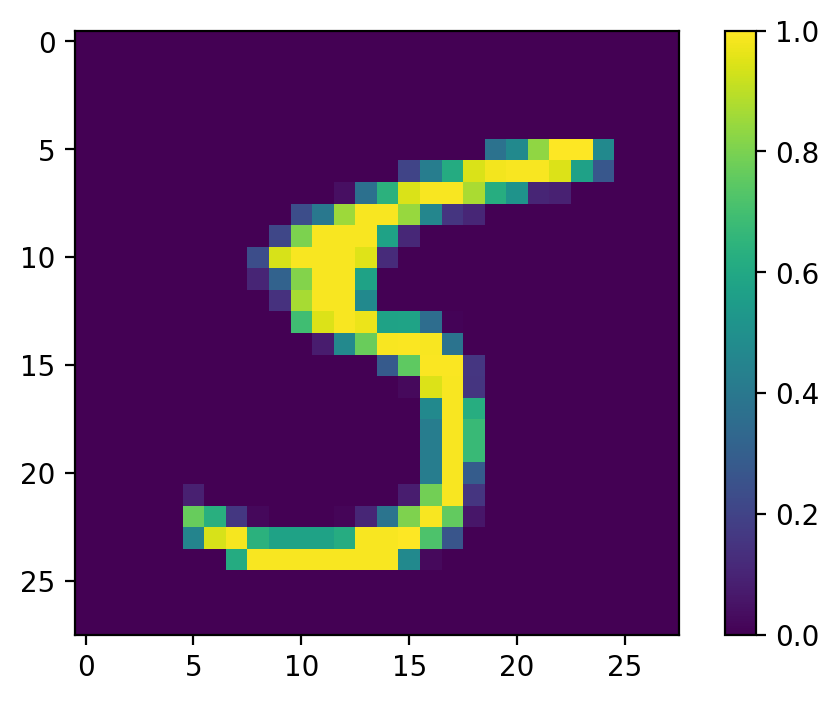

In [134]:
#Checking to see that the data is ok.
plt.imshow(train_images[-3])  
plt.colorbar()

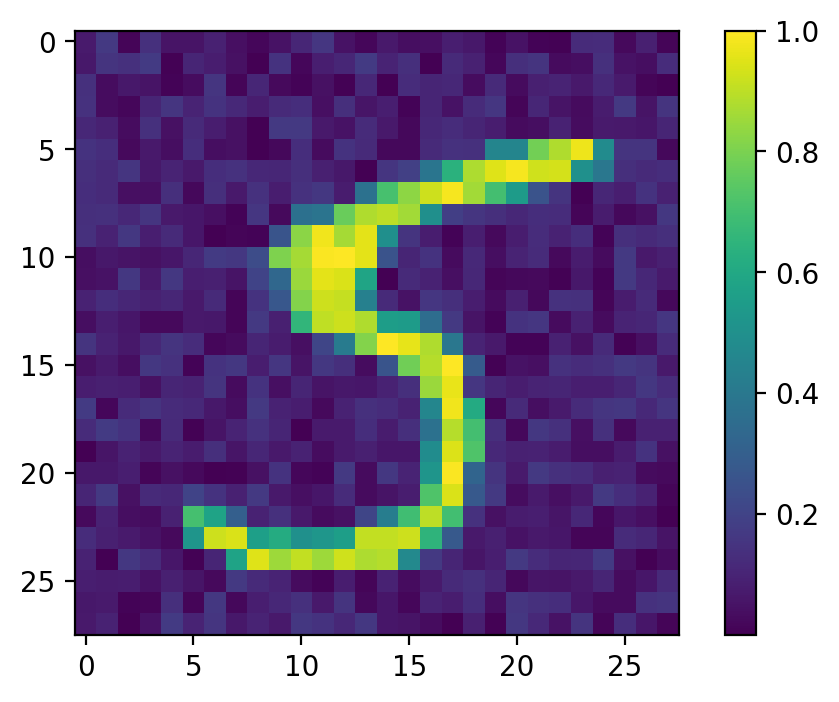

In [135]:
#trying out the add_noise function with MNIST.

noise_try = add_noise(train_images[-3], 0.2) #Generate the noisy image.
plt.imshow(noise_try)
plt.colorbar()

#Part 2: Training the NN with the MNIST dataset

Now, we setup the neural network that will learn from these images. This is done with the help of Keras.

In [136]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    #'flattens' our 28x28 pixel image into a 1-dimensional array of length 784 (=28x28)
    keras.layers.Dense(128,activation='relu'),    #fully connected (or dense) layer with 128 nodes. This layer has parameters.
    keras.layers.Dense(10)                        #the output layer and has 10 nodes which correspond to the digits 0:9. This layer has parameters.
])

Compile the model by setting the Loss function, Optimizer and Metrics.

In [137]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Finally, we train our first model using the training images(no noise yet).

In [138]:
history=model.fit(train_images, train_labels,batch_size=100, epochs=5)   #Set epoch=5 as it generates satisfactory values.

Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 0.4086 - accuracy: 0.8763
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1594 - accuracy: 0.9523
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1227 - accuracy: 0.9628
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1042 - accuracy: 0.9679
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0915 - accuracy: 0.9713


Let's look at some statistics of the model we just trained...

In [139]:
print(np.shape(test_images))                                                               
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)                

#print('\nTest accuracy:', test_acc)

(10000, 28, 28)
313/313 - 1s - loss: 0.1050 - accuracy: 0.9689 - 564ms/epoch - 2ms/step


#Part 3: Testing the accuracy of our model on the Test Images

Now, let's test the model we just trained on some test data and generate the graph of its acuracy as the noise is increased.

313/313 - 0s - loss: 0.1050 - accuracy: 0.9689 - 490ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1063 - accuracy: 0.9685 - 503ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1101 - accuracy: 0.9669 - 477ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1166 - accuracy: 0.9655 - 463ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1264 - accuracy: 0.9623 - 458ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1412 - accuracy: 0.9583 - 483ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1601 - accuracy: 0.9520 - 471ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1861 - accuracy: 0.9454 - 481ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2172 - accuracy: 0.9325 - 473ms/epoch - 2ms/step
313/313 - 0s - loss: 0.2600 - accuracy: 0.9144 - 474ms/epoch - 2ms/step
313/313 - 0s - loss: 0.3110 - accuracy: 0.8939 - 472ms/epoch - 2ms/step
313/313 - 0s - loss: 0.3727 - accuracy: 0.8705 - 487ms/epoch - 2ms/step
313/313 - 0s - loss: 0.4402 - accuracy: 0.8455 - 455ms/epoch - 1ms/step
313/313 - 0s - loss: 0.5149 - accuracy: 0.8208 - 486ms/epoch - 2

Text(0.5, 1.0, 'Dependence of accuracy on y-noise value')

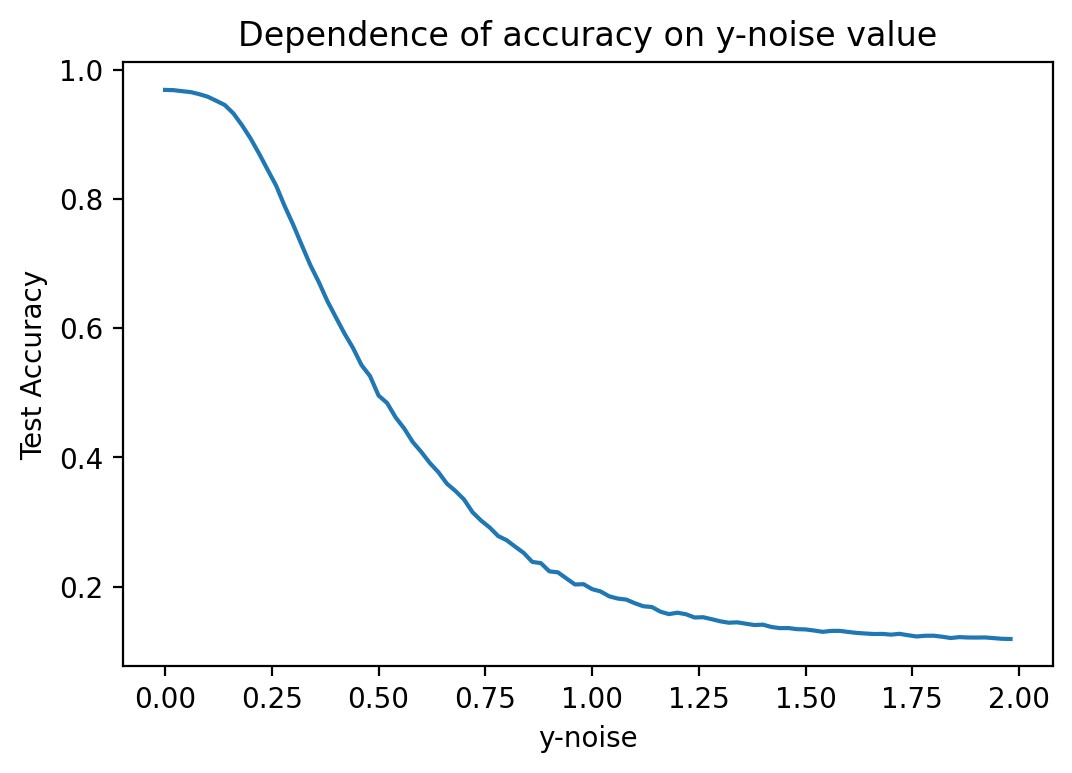

In [140]:
numsteps = 100                                                                                                    #Number of steps the for-loop runs.
ynoise = np.zeros((numsteps))                                                                                     
test_loss = np.zeros((numsteps))                                                                                  #Initiailize the arrays needed for the ensuing steps.
test_acc = np.zeros((numsteps))

##For-loop generates the accuacy of the model with respect to a changing magnitude of noise in data.
for i in range(numsteps):
  ynoise[i] = (((i)/50))                                                                                         #Set and store the values of ynoise as the loop runs. Has factor of 1/50 to test the model for small increases in noise.
  test_loss[i], test_acc[i] = model.evaluate(add_noise(test_images, ynoise[i]),  test_labels, verbose=2)


#Plot the graph.
plt.plot(ynoise,test_acc,'-')
plt.xlabel("y-noise")
plt.ylabel("Test Accuracy")
plt.title("Dependence of accuracy on y-noise value")


Looking at the graph, we can see that the graph mimics a sigmoid with a flipped x-axis. It shows that the accuracy decreases steeply (for the most part) as noise is increased, asymptotically appoaching zero.
______________________________________________________

Text(0.5, 1.0, 'Dependence of accuracy on y-noise value')

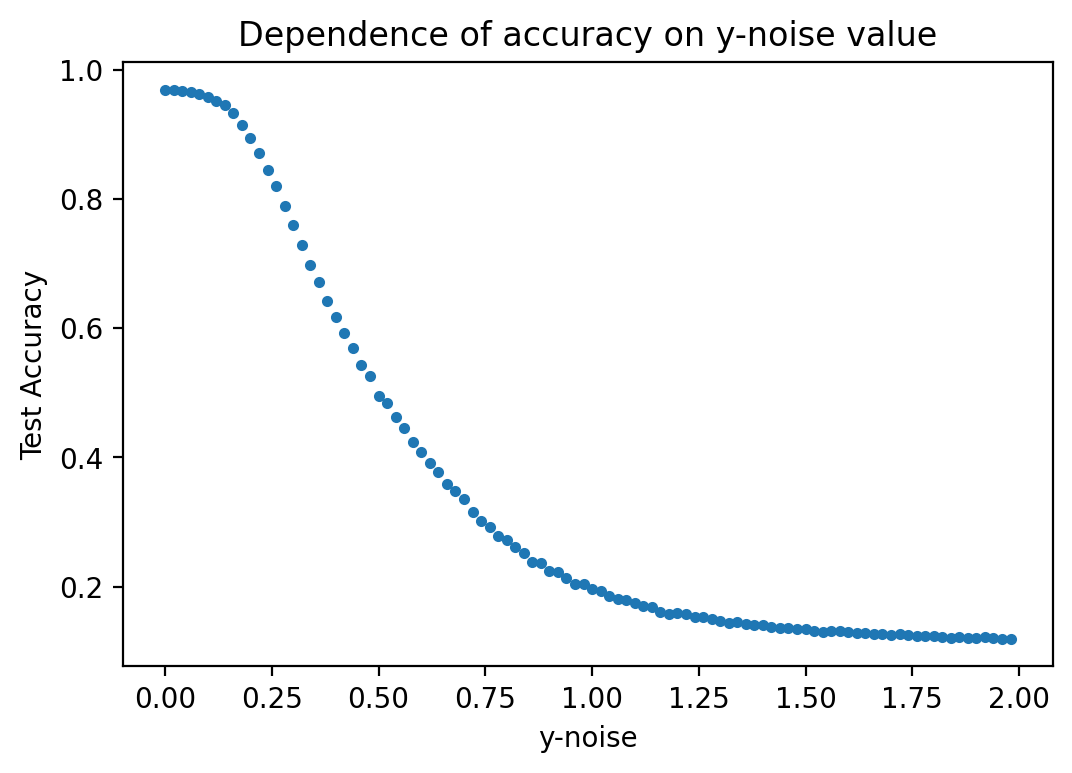

In [141]:
#Same graph a above, but with dots instead of lines.
plt.plot(ynoise,test_acc,'.')
plt.xlabel("y-noise")
plt.ylabel("Test Accuracy")
plt.title("Dependence of accuracy on y-noise value")


#Part 4: Training the model with Noise

First, we recompile the model and train on noisy data with ynoise=0.1

In [142]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

history = model.fit(add_noise(train_images, 0.1), train_labels,batch_size=100, epochs=5)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0861 - accuracy: 0.9734
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0787 - accuracy: 0.9753
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0718 - accuracy: 0.9771
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0635 - accuracy: 0.9799
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0600 - accuracy: 0.9808


Next, we run the same routine a part 3.

In [143]:
numsteps = 100
ynoise_1 = np.zeros((numsteps))
test_loss_1 = np.zeros((numsteps))
test_acc_1 = np.zeros((numsteps))

for i in range(numsteps):
  ynoise_1[i] = (((i)/50))
  test_loss_1[i], test_acc_1[i] = model.evaluate(add_noise(test_images, ynoise_1[i]),  test_labels, verbose=2)

313/313 - 1s - loss: 0.1463 - accuracy: 0.9642 - 580ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1364 - accuracy: 0.9656 - 471ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1290 - accuracy: 0.9655 - 482ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1228 - accuracy: 0.9650 - 516ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1184 - accuracy: 0.9664 - 479ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1175 - accuracy: 0.9644 - 491ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1159 - accuracy: 0.9652 - 502ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1177 - accuracy: 0.9647 - 471ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1175 - accuracy: 0.9655 - 487ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1228 - accuracy: 0.9616 - 523ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1297 - accuracy: 0.9613 - 462ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1359 - accuracy: 0.9584 - 466ms/epoch - 1ms/step
313/313 - 0s - loss: 0.1455 - accuracy: 0.9564 - 492ms/epoch - 2ms/step
313/313 - 0s - loss: 0.1619 - accuracy: 0.9497 - 497ms/epoch - 2

Text(0.5, 1.0, 'Dependence of accuracy on y-noise value')

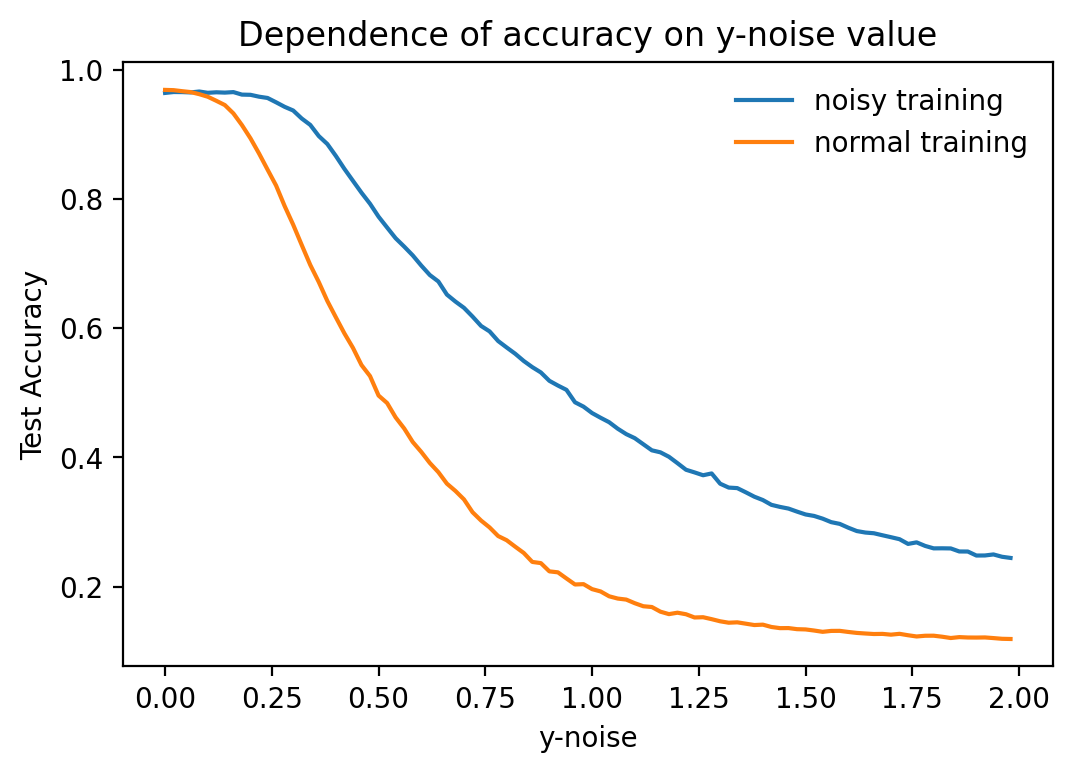

In [144]:
#Graphing the ynoise against the accuracy of noise-trained model and true-trained model 
plt.plot(ynoise_1,test_acc_1,'-',label='noisy training')
plt.plot(ynoise,test_acc,'-',label='normal training')
plt.legend()
plt.xlabel("y-noise")
plt.ylabel("Test Accuracy")
plt.title("Dependence of accuracy on y-noise value")

Lookin at this graph, we learn that the noise-trained model does a better job at rtaining goo accuracy for higher ynoise values than the true-trained model.
_______

#Part 5: What is best level of noise to train model on for best performance?

___________
###What does good performance mean in this context?
#####Here, when I say that a specific model has the best perfomance, I mean that it maintains the highest accuracy-values for increasing ynoise values. This can be determined by just looking at the graphs and deeciding which is better.
___________________________________

To do a comparison of the models generatd with different sigma values, we generate models with increasing ynoise associated with their training. In this cell, we use the values ynoise = [0.1 , 0.12 , 0.14 , 0.16 , 0.18 , 0.25]

In [147]:
history = model.fit(add_noise(train_images, 0.12), train_labels,batch_size=100, epochs=5)

numsteps = 100
ynoise_2 = np.zeros((numsteps))
test_loss_2 = np.zeros((numsteps))
test_acc_2 = np.zeros((numsteps))

for i in range(numsteps):
  ynoise_2[i] = (((i)/50))
  test_loss_2[i], test_acc_2[i] = model.evaluate(add_noise(test_images, ynoise_2[i]),  test_labels, verbose=2)






history = model.fit(add_noise(train_images, 0.14), train_labels,batch_size=100, epochs=5)

numsteps = 100
ynoise_3= np.zeros((numsteps))
test_loss_3 = np.zeros((numsteps))
test_acc_3 = np.zeros((numsteps))

for i in range(numsteps):
  ynoise_3[i] = (((i)/50))
  test_loss_3[i], test_acc_3[i] = model.evaluate(add_noise(test_images, ynoise_3[i]),  test_labels, verbose=2)







history = model.fit(add_noise(train_images, 0.16), train_labels,batch_size=100, epochs=5)

numsteps = 100
ynoise_4= np.zeros((numsteps))
test_loss_4 = np.zeros((numsteps))
test_acc_4 = np.zeros((numsteps))

for i in range(numsteps):
  ynoise_4[i] = (((i)/50))
  test_loss_4[i], test_acc_4[i] = model.evaluate(add_noise(test_images, ynoise_4[i]),  test_labels, verbose=2)








history = model.fit(add_noise(train_images, 0.18), train_labels,batch_size=100, epochs=5)

numsteps = 100
ynoise_5= np.zeros((numsteps))
test_loss_5 = np.zeros((numsteps))
test_acc_5 = np.zeros((numsteps))

for i in range(numsteps):
  ynoise_5[i] = (((i)/50))
  test_loss_5[i], test_acc_5[i] = model.evaluate(add_noise(test_images, ynoise_5[i]),  test_labels, verbose=2)






history = model.fit(add_noise(train_images, 0.25), train_labels,batch_size=100, epochs=5)

numsteps = 100
ynoise_6= np.zeros((numsteps))
test_loss_6 = np.zeros((numsteps))
test_acc_6 = np.zeros((numsteps))

for i in range(numsteps):
  ynoise_6[i] = (((i)/50))
  test_loss_6[i], test_acc_6[i] = model.evaluate(add_noise(test_images, ynoise_6[i]),  test_labels, verbose=2)




history = model.fit(add_noise(train_images, 0.7), train_labels,batch_size=100, epochs=5)

numsteps = 100
ynoise_7= np.zeros((numsteps))
test_loss_7 = np.zeros((numsteps))
test_acc_7 = np.zeros((numsteps))

for i in range(numsteps):
  ynoise_7[i] = (((i)/50))
  test_loss_7[i], test_acc_7[i] = model.evaluate(add_noise(test_images, ynoise_7[i]),  test_labels, verbose=2)






history = model.fit(add_noise(train_images, 1.3), train_labels,batch_size=100, epochs=5)
numsteps = 100
ynoise_8= np.zeros((numsteps))
test_loss_8 = np.zeros((numsteps))
test_acc_8 = np.zeros((numsteps))

for i in range(numsteps):
  ynoise_8[i] = (((i)/50))
  test_loss_8[i], test_acc_8[i] = model.evaluate(add_noise(test_images, ynoise_8[i]),  test_labels, verbose=2)


Epoch 1/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0211 - accuracy: 0.9929
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9937
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0145 - accuracy: 0.9956
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 5/5
600/600 [==============================] - 3s 6ms/step - loss: 0.0091 - accuracy: 0.9971
313/313 - 1s - loss: 0.2020 - accuracy: 0.9713 - 521ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1914 - accuracy: 0.9724 - 646ms/epoch - 2ms/step
313/313 - 1s - loss: 0.1836 - accuracy: 0.9727 - 862ms/epoch - 3ms/step
313/313 - 1s - loss: 0.1749 - accuracy: 0.9732 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.1712 - accuracy: 0.9729 - 1s/epoch - 3ms/step
313/313 - 1s - loss: 0.1648 - accuracy: 0.9729 - 992ms/epoch - 3ms/step
313/313 - 1s - loss: 0.1653 - accuracy: 0.9726 - 532ms/epoch - 2ms/step
313/313

And now we generate their accuracy-to-noise graphs on a single plot to compare.

Text(0.5, 1.0, 'Dependence of accuracy on y-noise value')

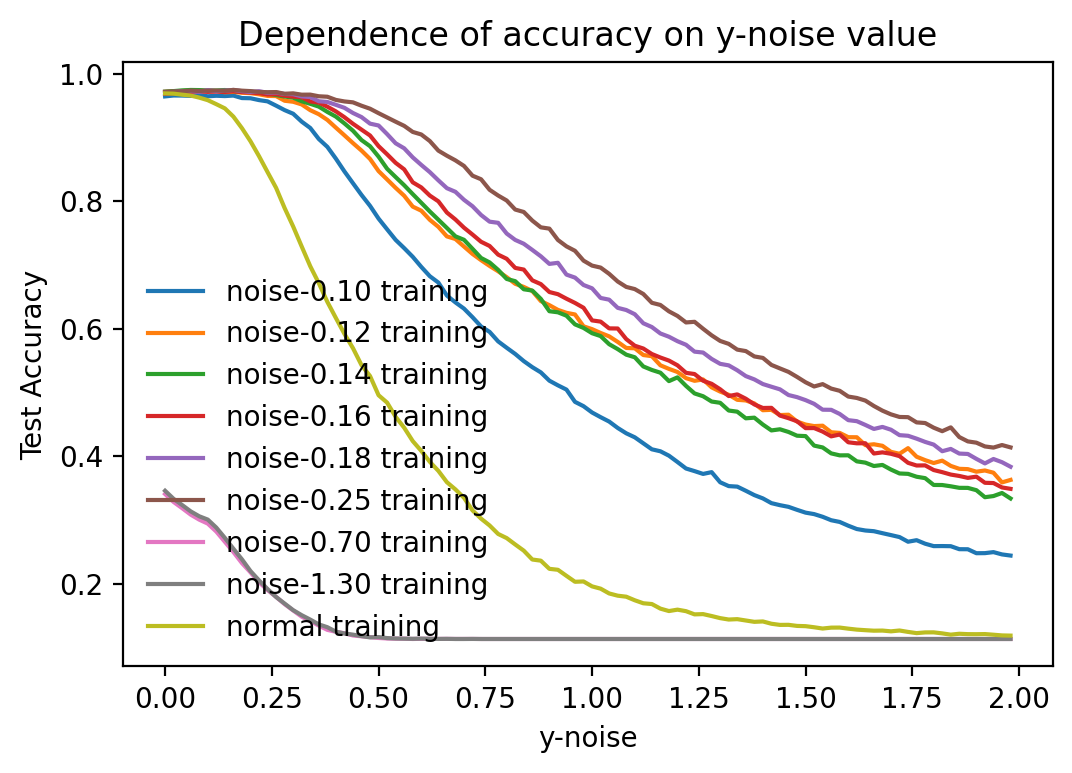

In [148]:
plt.plot(ynoise_1,test_acc_1,'-',label='noise-0.10 training')
plt.plot(ynoise_2,test_acc_2,'-',label='noise-0.12 training')
plt.plot(ynoise_3,test_acc_3,'-',label='noise-0.14 training')
plt.plot(ynoise_4,test_acc_4,'-',label='noise-0.16 training')
plt.plot(ynoise_5,test_acc_5,'-',label='noise-0.18 training')
plt.plot(ynoise_6,test_acc_6,'-',label='noise-0.25 training')
plt.plot(ynoise_7,test_acc_7,'-',label='noise-0.70 training')
plt.plot(ynoise_8,test_acc_8,'-',label='noise-1.30 training')

plt.plot(ynoise,test_acc,'-',label='normal training')
plt.legend()
plt.xlabel("y-noise")
plt.ylabel("Test Accuracy")
plt.title("Dependence of accuracy on y-noise value")

Looking at the graphs above, we can see that performance increaeses as training-noise increases up until ynoise=0.25. Then, there seems to be a steep drop in performance between 0.25 and 0.7, with no change in peformance between 0.7 and 1.3. **This indicates that the optimal ynoise-value is somewhere between 0.25 and 0.5.**